# 서울특별시 공공자전거 따릉이 대여이력 분석
* [miningful/seoulbike: 따릉이 따세권EDA](https://github.com/miningful/seoulbike)에서 흥미를 얻어 분석을 시작하게 됨

## 데이터 출처 :
* 서울특별시 공공자전거 대여이력 정보
http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15182&srvType=F&serviceKind=1&currentPageNo=1

* `(이달의주요공개정보)_서울_공공자전거(따릉이)_이용현황 자료(161021).xlsx (1.24MB)`
https://opengov.seoul.go.kr/anspruch/10045476


## 관련자료 
* [(석간) 서울시 따릉이 회원 62만 돌파 출 퇴근시간 38% 집중](http://spp.seoul.go.kr/main/news/news_report.jsp#view/253821)
* [공공자전거 따릉이 인기 따라 '따세권' 형성…소외지역도 :: 공감언론 뉴시스통신사 ::](http://www.newsis.com/view/?id=NISX20180706_0000356247&cID=10201&pID=10200)

## 사용할 도구 가져오기

In [1]:
import pandas as pd
import csv
from plotnine import *

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 데이터 불러오기

In [2]:
%ls data/seoul_bike/

서울_공공자전거_따릉이_이용현황자료_20161026.xlsx
서울특별시 공공자전거 대여이력 정보_2015년.csv
서울특별시 공공자전거 대여이력 정보_2016년_1.csv
서울특별시 공공자전거 대여이력 정보_2016년_2.csv
서울특별시 공공자전거 대여이력 정보_2016년_3.csv
서울특별시 공공자전거 대여이력 정보_2017년_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_2분기_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_2분기_2.csv
서울특별시 공공자전거 대여이력 정보_2017년_3분기_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_3분기_2.csv
서울특별시 공공자전거 대여이력 정보_2017년_4분기_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_4분기_2.csv
서울특별시 공공자전거 대여이력 정보_2018년_1분기1.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_1.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_2.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_3.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_4.csv


In [3]:
df = pd.read_csv('data/seoul_bike/서울특별시 공공자전거 대여이력 정보_2018년_2분기_4.csv', encoding='cp949')
df.shape

(586304, 11)

## 데이터 미리보기 및 요약하기

In [4]:
df.head()

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
0,'SPB-11906','2018-06-16 00:00:07','932',' 예일여중',1,'2018-06-16 00:16:41','934',' 신사동 성당',11,15,2160
1,'SPB-16954','2018-06-16 00:00:07','272',' 당산육갑문',16,'2018-06-16 02:00:36','1827',' 독산보도육교 앞 자전거 보관소',9,120,18100
2,'SPB-09676','2018-06-16 00:00:11','1036',' 고덕동 주양쇼핑',7,'2018-06-16 00:24:05','1038',' 강일 다솜 어린이 공원',9,23,3350
3,'SPB-07143','2018-06-16 00:00:15','1726',' 삼익세라믹아파트교차로',7,'2018-06-16 00:15:31','1706',' 기업은행 앞',9,14,1480
4,'SPB-13007','2018-06-16 00:00:16','2058',' 노량진동 맥도널드앞',10,'2018-06-16 00:14:25','258',' 신길역3번출구',8,13,2920


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586304 entries, 0 to 586303
Data columns (total 11 columns):
'자전거번호'      586304 non-null object
'대여일시'       586304 non-null object
'대여대여소번호'    586304 non-null object
'대여대여소명'     586304 non-null object
'대여거치대'      586304 non-null int64
'반납일시'       586304 non-null object
'반납대여소번호'    586304 non-null object
'반납대여소명'     586304 non-null object
'반납거치대'      586304 non-null int64
'이용시간(분)'    586304 non-null int64
'이용거리(M)'    586304 non-null int64
dtypes: int64(4), object(7)
memory usage: 49.2+ MB


## 분석을 위한 전처리

In [6]:
df.columns = df.columns.str.strip("'")

In [7]:
df['반납일시'].dtypes

dtype('O')

In [8]:
# 불필요하게 '가 들어가 있다. 스트링 타입으로 되어있는 데이터에서 '을 제거하자.
df.iloc[:, :4] = df.iloc[:, :4].apply(lambda x: x.str.strip("'"))
df.iloc[:, 5:8] = df.iloc[:, 5:8].apply(lambda x: x.str.strip("'"))

In [9]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,SPB-11906,2018-06-16 00:00:07,932,예일여중,1,2018-06-16 00:16:41,934,신사동 성당,11,15,2160
1,SPB-16954,2018-06-16 00:00:07,272,당산육갑문,16,2018-06-16 02:00:36,1827,독산보도육교 앞 자전거 보관소,9,120,18100
2,SPB-09676,2018-06-16 00:00:11,1036,고덕동 주양쇼핑,7,2018-06-16 00:24:05,1038,강일 다솜 어린이 공원,9,23,3350
3,SPB-07143,2018-06-16 00:00:15,1726,삼익세라믹아파트교차로,7,2018-06-16 00:15:31,1706,기업은행 앞,9,14,1480
4,SPB-13007,2018-06-16 00:00:16,2058,노량진동 맥도널드앞,10,2018-06-16 00:14:25,258,신길역3번출구,8,13,2920


In [10]:
df.tail()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
586299,SPB-15985,2018-06-30 23:59:55,505,자양사거리 광진아크로텔 앞,9,2018-07-01 00:09:38,593,자양중앙나들목,5,9,1230
586300,SPB-15081,2018-06-30 23:59:55,1328,월곡역 3번출구,7,2018-07-01 00:18:02,647,신이문역 1번출구,7,17,3600
586301,SPB-13677,2018-06-30 23:59:57,2376,수서역 6번출구 앞,2,2018-07-01 00:20:38,2387,래미안강남힐즈 사거리,5,20,2590
586302,SPB-06577,2018-06-30 23:59:57,1251,석촌역 2번출구,2,2018-07-01 00:57:29,1245,문정 법조단지9,4,57,6640
586303,SPB-03842,2018-06-30 23:59:58,2169,봉천역 2번출구,6,2018-07-01 00:08:05,2112,서울대입구역 마에스트로,7,7,910


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586304 entries, 0 to 586303
Data columns (total 11 columns):
자전거번호      586304 non-null object
대여일시       586304 non-null object
대여대여소번호    586304 non-null object
대여대여소명     586304 non-null object
대여거치대      586304 non-null int64
반납일시       586304 non-null object
반납대여소번호    586304 non-null object
반납대여소명     586304 non-null object
반납거치대      586304 non-null int64
이용시간(분)    586304 non-null int64
이용거리(M)    586304 non-null int64
dtypes: int64(4), object(7)
memory usage: 49.2+ MB


## 결측치 보기

In [12]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간(분)    0
이용거리(M)    0
dtype: int64

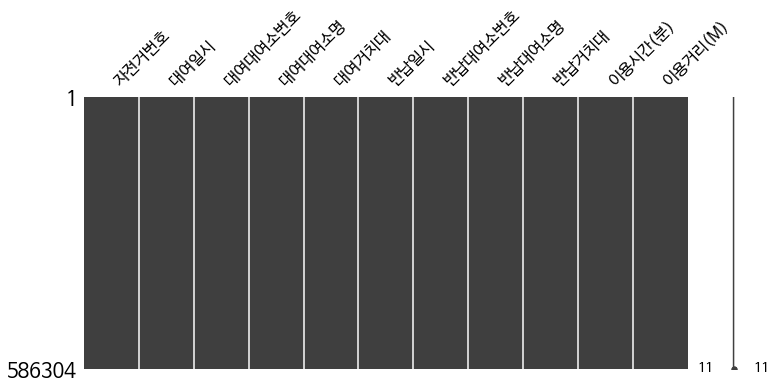

In [13]:
# 결측치 보기
import missingno as msno

msno.matrix(df, figsize=(12,5))

In [14]:
df['대여대여소번호'].value_counts().tail(10)

2343        39
1101        38
2288        29
741         27
2275        26
1040        25
2287        21
2286        16
상암센터 정비실     8
554          5
Name: 대여대여소번호, dtype: int64

* 대여 대여소번호에 상암센터 정비실과 위트콤 같은 숫자가 아닌 곳들이 있음

In [15]:
# 대여량이 많은 상위 대여소
df['대여대여소명'].value_counts().head(10)

 여의나루역 1번출구 앞               4073
 뚝섬유원지역 1번출구 앞              3369
 홍대입구역 2번출구 앞               3174
 봉림교 교통섬                    2709
 롯데월드타워(잠실역2번출구 쪽)          2637
 고속터미널역 8-1번, 8-2번 출구 사이    2453
 마포구민체육센터 앞                 2178
 신도림역 1번 출구 앞               2022
 안암로터리 버스정류장 앞              1987
 잠실새내역 5번 출구 뒤              1841
Name: 대여대여소명, dtype: int64

In [16]:
# 반납량이 많은 상위 대여소
df['반납대여소명'].value_counts().head(10)

 홍대입구역 2번출구 앞               3896
 뚝섬유원지역 1번출구 앞              3814
 여의나루역 1번출구 앞               3730
 봉림교 교통섬                    2762
 롯데월드타워(잠실역2번출구 쪽)          2624
 고속터미널역 8-1번, 8-2번 출구 사이    2495
 마포구민체육센터 앞                 2454
 안암로터리 버스정류장 앞              2110
 신도림역 1번 출구 앞               1961
 CJ 드림시티                    1932
Name: 반납대여소명, dtype: int64

1. 대여반납이 많은 상위 대여소인 홍대입구역, 여의나루역, 뚝섬유원지, 롯데월드타워는 모두 강이나 호수를 인근에 두고 있다. 
2. 성대입구나 안암로터리 버스정류장은 대학가 인근이다.

In [27]:
# 평균 이용거리가 긴 상위 대여소
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index().sort_values(by='이용거리(M)', ascending=False).head(10)

,대여대여소명,이용거리(M)
353,동작역 5번출구 동작주차공원,10454.240000
330,독산보도육교 앞 자전거 보관소,10401.840607
810,신한은행 시흥대로금융센터지점,9857.738095
280,달맞이공원,9639.504950
1166,한내근린공원 남측,9419.090909
1197,현대자동차서비스 앞,9364.282178
419,망원초록길 입구,9160.294118
1194,현대고등학교 건너편,9047.614350
1231,흑석역 1번출구,8938.909300
1113,청계천 생태교실 앞,8923.918819


In [18]:
# 평균 이용거리가 짧은 대여소
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index().sort_values(by='이용거리(M)', ascending=True).head()

,대여대여소명,이용거리(M)
1249,상암센터 정비실,256.250000
188,국군복지단,1828.244275
7,CJ오쇼핑앞,1832.727273
100,건국대학교 과학관(이과대) 앞,2143.065327
937,원남동사거리,2234.752294


In [19]:
# 평균 이용시간이 많은 상위 대여소
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index().sort_values(by='이용시간(분)', ascending=False).head()

,대여대여소명,이용시간(분)
280,달맞이공원,59.782178
353,동작역 5번출구 동작주차공원,59.484000
93,개화동상사마을종점 버스정류장,55.500000
649,서울숲 남문 버스정류소 옆,55.495074
648,서울숲 관리사무소,55.492228


In [20]:
# 평균 이용시간이 적은 상위 대여소
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index().sort_values(by='이용시간(분)', ascending=True).head()

,대여대여소명,이용시간(분)
7,CJ오쇼핑앞,11.416667
1249,상암센터 정비실,12.000000
188,국군복지단,12.022901
1089,참새공원(백곡경노당),12.666667
575,삼일초등학교 인근,14.460274


## 시계열 데이터 보기

In [21]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
df.dtypes

자전거번호              object
대여일시       datetime64[ns]
대여대여소번호            object
대여대여소명             object
대여거치대               int64
반납일시       datetime64[ns]
반납대여소번호            object
반납대여소명             object
반납거치대               int64
이용시간(분)             int64
이용거리(M)             int64
dtype: object

In [22]:
df['대여년'] = df['대여일시'].dt.year
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
df['대여분'] = df['대여일시'].dt.minute
df['대여요일'] = df['대여일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일'],
      dtype='object')

In [23]:
df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일'],
      dtype='object')

In [24]:
df_rent = df['대여요일'].value_counts().reset_index()
df_rent.columns = ['datetime', 'count']
df_rent = df_rent.sort_values('datetime')
df_rent.head()

,datetime,count
4,0,81933
6,1,53151
2,2,86805
5,3,74772
1,4,89337


In [25]:
weekday_map= {0:'MON', 1:'TUE', 2:'WED', 3:'THU',
              4:'FRI', 5:'SAT', 6:'SUN'}

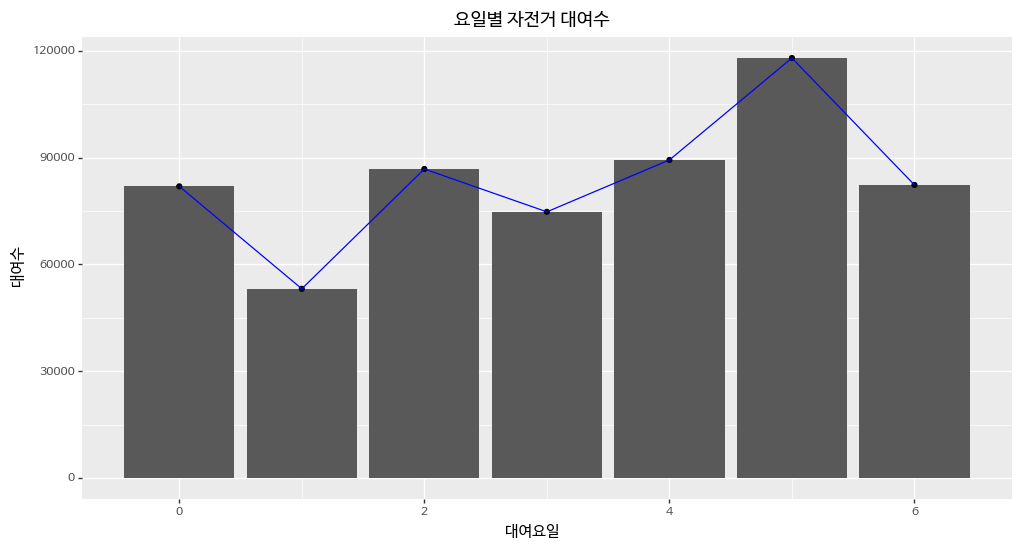

<ggplot: (-9223372036556972740)>

In [26]:
(ggplot(df_rent)
 + aes(x='datetime', y='count')
 + geom_bar(stat='identity')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='대여요일', y='대여수', title='요일별 자전거 대여수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6))
)